## Final Project

- Main Questions:
We aim to understand the correlation between the timing of Twitter account creation and
the level of engagement regarding current events in the platform. This could help us determine
if certain world events, such as the COVID-19 pandemic or the #BLM movement, influenced the creation of new
accounts or if accounts created during specific periods are more active in discussing "hot topics".

- Data Resources:
We would be using the *acc_age* field, which represents the age of the accounts in days and
the verified status to measure credibility which potentially affects the account’s engagement
and reach. Additionally, by using the accounts’ creation date, we can categorize the accounts
by year and find in which year/period were created the highest number of accounts. This
could help us determine if accounts created during the pandemic were more engaged in
COVID-19 related tweets than older accounts or vice versa. Other relevant fields include
date, which indicates when each tweet was posted, allowing us to temporally analyze tweet
volume over time. Finally, we would have engagement metrics like rt rt count (retweet
count), rt reply count (reply count), and rt fav count (like count), which will help us measure
the influence and reach of the tweets from these accounts. By looking at these data fields, we
can understand how Twitter accounts created at different times contribute to the discourse
on COVID-19, exploring whether significant world events like the pandemic have increased
account creations or if these newly created accounts engage differently with the topic.
---------------------------------------------------------------------------------------------------------------------------------------------

## Plan

1. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes
2. With acc_age and account_creation_date, create a time series analysis plot to assess how many accounts were created pre- and post- the first occurrence of the hashtag *#COVID* / *#BLM* / *#StopAsianHate* - answer the question **What is the relationship between the onset of these current events and the creation of twitter accounts?**
4. Create a time series analysis plot to assess the volume of tweets for each over time (assesing any relationship between tweeting and world events) - answer the question **What is the relationship between the onset of these current events and the volume of tweets?**
5. Use sentiment analysis to assess the sentiments of the tweets surrounding these current events - answer the question **What is the language of these tweets?**
6. Using the bot dictionary (Professor Chang is sending us a dictionary of bots) are any of these tweets - answer the question **How credible are the accounts tweeting about these current events?**
---------------------------------------------------------------------------------------------------------------------------------------------

### 0A. Exploring the Data
What is the data we're looking at?

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import re
from textblob import TextBlob
import string
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Insert YOUR path to data
pickle = "/Users/emmanguyen/Downloads/BLM_StopAsianHate.pkl"
data = pd.read_pickle(pickle)

In [2]:
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 1678460 entries, 1771 to 174882
Data columns (total 77 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   tweetid                1678460 non-null  int64              
 1   userid                 1678460 non-null  int64              
 2   screen_name            1678460 non-null  object             
 3   date                   1678460 non-null  datetime64[ns, UTC]
 4   lang                   1678460 non-null  object             
 5   location               1023285 non-null  object             
 6   place_id               12259 non-null    object             
 7   place_url              12259 non-null    object             
 8   place_type             12259 non-null    object             
 9   place_name             12259 non-null    object             
 10  place_full_name        12259 non-null    object             
 11  place_country_code     1224

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,is_kw,description,rt_user_description,qtd_user_description,acc_age
1771,1220644546771591168,95655465,shaunrein,2020-01-24 09:48:33+00:00,en,Shanghai (8621) 6326-9991 info@researchcmr.com,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
10596,1220646659052326914,901844487315406850,friendofwinter,2020-01-24 09:56:56+00:00,en,"bts, blackpink, and girlgroups",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
11024,1220646239630315520,1110768577953460226,JENDERALISA,2020-01-24 09:55:16+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
13401,1220643783286644736,2530100864,MSasisom,2020-01-24 09:45:31+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
14390,1220642807930478592,150572999,jackrizley,2020-01-24 09:41:38+00:00,en,"Bangkok, Thailand",NaN,NaN,NaN,NaN,...,NaN,NaN,Thailand,Switzerland,NaN,True,NaN,NaN,NaN,NaN
15547,1220641695651389440,859287999539929090,zqmkni,2020-01-24 09:37:13+00:00,en,ty track’s heart,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
15708,1220641540063649794,1054619120753242113,TheVandelay,2020-01-24 09:36:36+00:00,en,Hell,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
16099,1220641114576699392,4363890732,phiisu_,2020-01-24 09:34:54+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
16470,1220640742097342464,1694181907,i_Aeoy,2020-01-24 09:33:25+00:00,en,"Thailand,Chonburi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
17427,1220639678631727105,966319144315449349,IC_muchie,2020-01-24 09:29:12+00:00,en,India,NaN,NaN,NaN,NaN,...,NaN,NaN,India,Switzerland,NaN,True,NaN,NaN,NaN,NaN


### 00B. Converting important columns
Create a YMD column of just the year, month, and date of tweet posted.

In [3]:
## Creating Date Posted column of just Year, Month, Date

data['date_ymd'] = data['date'].dt.strftime('%Y-%m-%d')
data['date_ymd'] = pd.to_datetime(data['date_ymd'], format='%Y-%m-%d')

## Creating Account Created column of just Year, Month, Date
def convert_to_ymd(date_str):
    date_obj = datetime.strptime(date_str, '%a %b %d %H:%M:%S %z %Y')
    return date_obj.strftime('%Y-%m-%d')

data['acc_created_ymd'] = data['account_creation_date'].apply(convert_to_ymd)
data['acc_created_ymd'] = pd.to_datetime(data['acc_created_ymd'], format='%Y-%m-%d')

## Creating Text column without Hyperlink
def remove_urls(text):
    return re.sub(r'https?://\S+', '', text)

data['cleaned_text'] = data['text'].apply(remove_urls)

---------------------------------------------------------------------------------------------------------------------------------------------

### 01. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes.

#### 01A. Exploring hashtags

For #stopasianhate, there are many variations of anti-asian racism occurences. We wanted to search to see the variations of anti-asian racism. For COVID-19, we found most hashtags contain "covid" or "coronavirus". For BLM, we chose "blm" and "blacklives".

In [4]:
## Create df of just #BLM-related tweets
blm = data[data["hashtag"].str.contains("black|blm|george floyd|derek chauvin", case = False, na = False)]
testingblm = blm[["hashtag", "date_ymd", "cleaned_text"]].sort_values(by = "date_ymd").reset_index()

## Create df of just #StopAsianHate-related tweets
asian = data[data["hashtag"].str.contains("asianlives|yellowlives|stopasianhate|stopaapihate", case = False, na = False)]
testingasian = asian[["hashtag", "date_ymd", "cleaned_text"]].sort_values(by = "date_ymd").reset_index()

## Create df of just #COVID-related tweets
covid = data[data["hashtag"].str.contains("covid|coronavirus|pandemic|pfizer|moderna|omicron variant|delta variant", case = False, na = False)]
testingcovid = covid[["hashtag", "date_ymd", "cleaned_text"]].sort_values(by = "date_ymd").reset_index()

In [5]:
#Testing - pull a random tweet and see the text
print(testingblm.iloc[3, 3])
print(testingasian.iloc[3, 3])
print(testingcovid.iloc[3, 3])

RT @Coronachan1: @MisterAntiBully I went there and coughed on blacks so people couldn't call me racist. #sjw #coronavirus #BlackLivesMatter
Wave of racist attacks against Asian Americans in wake of coronavirus outbreak  We say NO to #RacialDiscrimination  #StopBeingRacist #AsianLivesMatters #AsianLivesMatter #BlackLivesMatters #BlackLivesMatter #RacialHarmonyIsImportant  
RT @WHO: @DrTedros Reduce your risk of #coronavirus infection  


#### 01B. Defining a function to find the first occurrence within each hashtag subset

This variable will be used for comparison.

In [6]:
## hashtag: takes in a list of strings of hashtags
def first_hashtag(df):

    #select just the first occurrence per day
    first_occurrences = df.drop_duplicates(subset = 'hashtag', keep = 'first').reset_index()
    first_date = first_occurrences.iloc[0, 3]
    
    return first_date

In [7]:
blm_first = first_hashtag(testingblm)
print(blm_first)

covid_first = first_hashtag(testingcovid)
print(covid_first)

sah_first = first_hashtag(testingasian)
print(sah_first)

2020-01-27 00:00:00
2020-01-23 00:00:00
2020-02-05 00:00:00


* First occurrence of #BLM-related hashtags: 2020-01-27 (January 27 2020)
* First occurrence of #COVID-19-related hashtage: 2020-01-23 (January 23 2020)
* First occurrence of #StopAsianHate-related hashtags: 2020-02-05 (February 5 2020)

To compare with news articles and timelines:

* [CDC COVID-19 Timeline](https://www.cdc.gov/museum/timeline/covid19.html) 
* [Georgetown BLM Timeline](https://repository.library.georgetown.edu/bitstream/handle/10822/1040691/Black%20Lives%20Matter%20Timeline%20.pdf?sequence=1)
* [Stop AAPI Hate Project's Origins](https://stopaapihate.org/our-origins/)
* [Anti-Asian Hate Crime During the COVID-19 Pandemic: Exploring the Reproduction of Inequality](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7364747/)
* [Vox Article on Stop Asian Hate Movement's Trajectory](https://www.vox.com/22820364/stop-asian-hate-movement-atlanta-shootings)

---------------------------------------------------------------------------------------------------------------------------------------------

### 02. What is the relationship between the onset of these current events and the creation of twitter accounts?

In [8]:
def creation_df(df, first_date):
    #assumption: screen_names don't change over time
    unique_accounts = df.drop_duplicates(subset = ['userid', 'screen_name'], keep = 'first').reset_index()
    dat = unique_accounts[["userid", "screen_name", "acc_created_ymd", "cleaned_text", "hashtag"]].sort_values(by = 'acc_created_ymd').reset_index(drop=True)
    dat['acc_created_ymd'] = pd.to_datetime(dat['acc_created_ymd'])
    created = dat.set_index('acc_created_ymd').resample('D').size().reset_index(name='acc_created_counts')
    created_clean = created[created["acc_created_ymd"] >= first_date].reset_index(drop=True)
    return pd.DataFrame(created_clean)

blm_created = creation_df(blm, blm_first)
asian_created = creation_df(asian, sah_first)
covid_created = creation_df(covid, covid_first)

In [9]:
def plot_events():
    events = pd.DataFrame([{'Health Emergency': '30-01-2020', 'George Floyd Passes Away': '05-25-2020',
                        'Atlanta Shootings': '16-03-2021', 'Pandemic': '03-11-2020', 'OMICRON Variant': '24-11-2021',
                        'BLM Protests Across Country': '06-06-2020', 'Chauvin for New Trial': '05-05-2021', 
                        'Trump Infected With COVID-19': '10-02-2020','DELTA Variant': '06-15-2021'}])

    # Y-axis range calculation for text placement
    y_min, y_max = plt.ylim()
    y_text_placement = y_max + (y_max - y_min) * 0.05  # Adjusting text placement above the top

    # Overlay each event
    for event, date in events.items():
        date = pd.to_datetime(date)
        plt.axvline(date, color='purple', linestyle='--', linewidth=1)
        plt.text(date, y_text_placement, event, rotation=90, verticalalignment='bottom', horizontalalignment='right',
             color='purple', fontsize=9)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(blm_created['acc_created_ymd'], blm_created['acc_created_counts'], label='#BLM Tweeters Account Creation')
plt.plot(asian_created['acc_created_ymd'], asian_created['acc_created_counts'], label='#StopAsianHate Tweeters Account Creation')
plt.plot(covid_created['acc_created_ymd'], covid_created['acc_created_counts'], label='#COVID-19 Tweeters Account Creation')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Daily Accounts Created Related to #COVID, #BlackLivesMatter, & #StopAsianHate', pad=175, fontsize = 16)


plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/account_creation_subgroups.png')

In [ ]:
# Find account creation for each day
daily_accs_clean = creation_df(data, covid_first)

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_accs_clean['acc_created_ymd'], daily_accs_clean['acc_created_counts'], label='Account Creation Volume')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.tight_layout()
plot_events()
plt.legend()
plt.title('Number of Accounts Created Per Day - All Subgroups', pad=175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/account_creation_all.png')

In [ ]:
merged_accounts = daily_accs_clean.merge(blm_created, on='acc_created_ymd', how='outer', suffixes=('_all', '_blm'))\
               .merge(asian_created, on='acc_created_ymd', how='outer', suffixes=('', '_asian'))

merged_accounts = merged_accounts.rename(columns={
    'acc_created_counts': 'acc_created_counts_asian'
})

merged_accounts["prop_blm"] = (merged_accounts["acc_created_counts_blm"] / merged_accounts["acc_created_counts_all"]) * 100
merged_accounts["prop_asian"] = (merged_accounts["acc_created_counts_asian"] / merged_accounts["acc_created_counts_all"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_accounts['acc_created_ymd'], merged_accounts['prop_blm'], label='Percent (%) of #BLM-related Accounts Created')
plt.plot(merged_accounts['acc_created_ymd'], merged_accounts['prop_asian'], label='Percent (%) of #StopAsianHate-related Accounts Created')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Accounts Created')
plt.title('Percent (%) of #BlackLivesMatter and #StopAsianHate Accounts Created Per Day', pad=175, fontsize = 16)
plt.legend()

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/account_creation_all_props.png')

---------------------------------------------------------------------------------------------------------------------------------------------

### 03. What is the relationship between the onset of these current events and the volume of tweets?

In [13]:
def volume_df(df):
    dat = df[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index(drop=True)
    volume = dat.resample('D', on='date_ymd').size().reset_index(name = 'tweet_count')
    return pd.DataFrame(volume)

In [14]:
blm_volume = volume_df(blm)
asian_volume = volume_df(asian)
covid_volume = volume_df(covid)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(blm_volume['date_ymd'], blm_volume['tweet_count'], label='#BLM Tweet Volume')
plt.plot(asian_volume['date_ymd'], asian_volume['tweet_count'], label='#StopAsianHate Tweet Volume')
plt.plot(covid_volume['date_ymd'], covid_volume['tweet_count'], label='#COVID-19 Tweet Volume')
plt.xlabel('Date')
plt.ylim(0, 7500)
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Daily Tweet Volumes Related to #COVID, #BlackLivesMatter, & #StopAsianHate', pad=175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_volume_subgroup.png')

In [ ]:
# Find tweet count for each day
daily_tweets = data.resample('D', on='date_ymd').size().reset_index(name='tweet_count')

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets['date_ymd'], daily_tweets['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plot_events()
plt.legend()
plt.title('Daily Tweet Counts - All Subgroups', pad=175, fontsize = 16)


plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_volume_all.png')

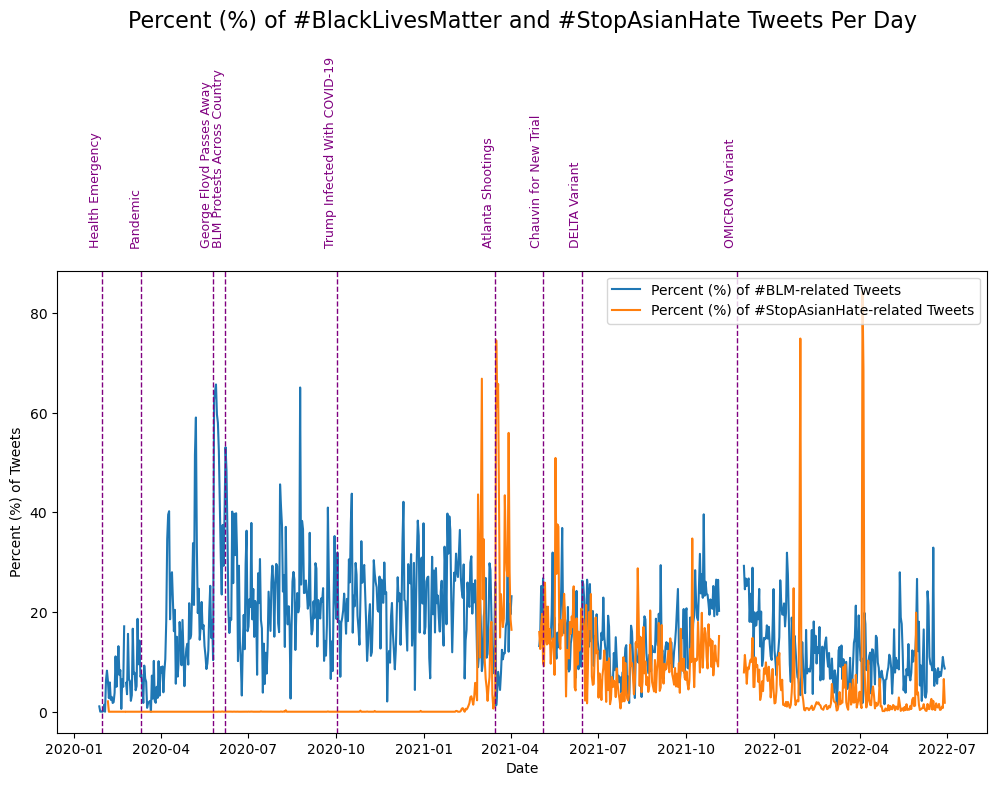

In [62]:
merged_tweets = daily_tweets.merge(blm_volume, on='date_ymd', how='outer', suffixes=('_all', '_blm'))\
               .merge(asian_volume, on='date_ymd', how='outer', suffixes=('', '_asian'))

merged_tweets = merged_tweets.rename(columns={
    'tweet_count': 'tweet_count_asian'
})

merged_tweets["prop_blm"] = (merged_tweets["tweet_count_blm"] / merged_tweets["tweet_count_all"]) * 100
merged_tweets["prop_asian"] = (merged_tweets["tweet_count_asian"] / merged_tweets["tweet_count_all"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_tweets['date_ymd'], merged_tweets['prop_blm'], label='Percent (%) of #BLM-related Tweets')
plt.plot(merged_tweets['date_ymd'], merged_tweets['prop_asian'], label='Percent (%) of #StopAsianHate-related Tweets')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Tweets')
plt.legend()
plt.title('Percent (%) of #BlackLivesMatter and #StopAsianHate Tweets Per Day', pad=175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_volume_all_props.png')

---------------------------------------------------------------------------------------------------------------------------------------------
### 04: Sentiment Analysis

#### Polarity and Subjectivity Sentiment Analysis

In [18]:
def sentiment(tweets):
    polarity = []
    subjectivity = []
    
    for tweet in tweets['cleaned_text']:
        pol = TextBlob(tweet).sentiment.polarity
        polarity.append(pol)
        subj = TextBlob(tweet).sentiment.subjectivity
        subjectivity.append(subj)
        
    return polarity, subjectivity

In [19]:
# Analyze sentiment
blm_sent = sentiment(blm)
asian_sent = sentiment(asian)
covid_sent = sentiment(covid)

In [20]:
def append_polsubj(senti_list):
    polarity_list = senti_list[0]
    subjectivity_list = senti_list[1]

    polsub_df = pd.DataFrame({
        'polarity': polarity_list,
        'subjectivity': subjectivity_list}).reset_index()
    
    return polsub_df

In [21]:
blm_polsub_scores = append_polsubj(blm_sent)
blm_polsub = pd.concat([blm.reset_index(), blm_polsub_scores], axis = 1).sort_values(by = "polarity", ascending = False).reset_index(drop = True)
blm_polsub

sah_polsub_scores = append_polsubj(asian_sent)
sah_polsub = pd.concat([asian.reset_index(), sah_polsub_scores], axis = 1).sort_values(by = "polarity", ascending = False).reset_index(drop = True)
sah_polsub

,index,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,...,description,rt_user_description,qtd_user_description,acc_age,date_ymd,acc_created_ymd,cleaned_text,index,polarity,subjectivity
0,55104,1376788974669164546,1350303167246811136,Lokesh_2020V,2021-03-30 06:50:45+00:00,en,Dehradun,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-30,2021-01-16,Best reply by grandfather #tuesdaymotivations ...,42881,1.0,0.30
1,10229,1372716448322363393,1368995602785312779,DareOlayinka7,2021-03-19 01:07:59+00:00,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-19,2021-03-08,@JaroslavTvrdik @WestHam_Central This is just...,23596,1.0,1.00
2,85546,1395493722721116160,919408141225181185,humen543,2021-05-20 21:36:45+00:00,en,"台北市, 台灣",NaN,NaN,NaN,...,"father,writer,thinker,lover,❤️zen,yoga",NaN,NaN,NaN,2021-05-20,2017-10-15,#Biden signed the #COVID-19 #HateCrimesACt int...,4702,1.0,0.75
3,129582,1405539512600522762,1305653620688519168,Nade78505198,2021-06-17 14:55:08+00:00,en,NaN,NaN,NaN,NaN,...,C'EST DU SÉRIEUX ICI\n#FRUITSBASKET,NaN,NaN,NaN,2021-06-17,2020-09-14,Stay safe !!!! #COVID19 #Pride #burkini #Thank...,3409,1.0,0.50
4,76753,1376622503238451201,1040569110,ThomasJToner,2021-03-29 19:49:15+00:00,en,NY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-29,2012-12-27,Happy Monday My Twitter Family! Please #WearAM...,22415,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74513,86430,1479278854841765888,2593547563,JohnsonTasha848,2022-01-07 02:28:57+00:00,en,NaN,NaN,NaN,NaN,...,Pediatrician at McMaster. Proud mom of two so...,NaN,Mom•wife•racialized settler🔸Palliative Care & ...,2749.0,2022-01-07,2014-06-28,RT @TabassumWyne: Disgusting. #StopAsianHate,72649,-1.0,1.00
74514,40823,1479274999403982849,1263384659905449985,TabassumWyne,2022-01-07 02:13:38+00:00,en,NaN,NaN,NaN,NaN,...,Executive Director of the Muslim Advisory Coun...,NaN,Mom•wife•racialized settler🔸Palliative Care & ...,595.0,2022-01-07,2020-05-21,Disgusting. #StopAsianHate,72644,-1.0,1.00
74515,65536,1373830392759775232,1067590556,vinscent_,2021-03-22 02:54:24+00:00,en,IE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-03-22,2013-01-07,RT @aidanaras: Absolutely disgusting. These ar...,19590,-1.0,1.00
74516,63108,1373829887912411152,821181272219234304,aidanaras,2021-03-22 02:52:24+00:00,en,"Los Angeles, CA",3d533362cdab8107,https://api.twitter.com/1.1/geo/id/3d533362cda...,city,...,NaN,NaN,NaN,NaN,2021-03-22,2017-01-17,Absolutely disgusting. These are the people tr...,19587,-1.0,1.00


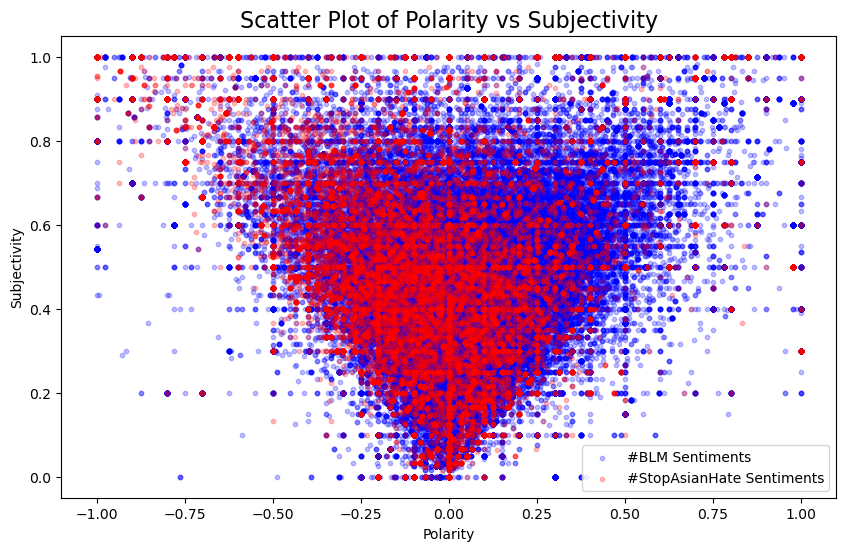

In [61]:
# Scatter plot for df1
plt.figure(figsize=(10, 6))
scatter_df1 = plt.scatter(blm_polsub['polarity'], blm_polsub['subjectivity'], color='blue', label='#BLM Sentiments', s=10, alpha=0.25)

# Scatter plot for df2
scatter_df2 = plt.scatter(sah_polsub['polarity'], sah_polsub['subjectivity'], color='red', label='#StopAsianHate Sentiments', s=10, alpha=0.25)

# Adding labels and title
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Scatter Plot of Polarity vs Subjectivity', fontsize = 16)

# Adding legend
plt.legend()

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/sentiment_polsubj.png')

#### Positive and Negative Sentiment Analysis

In [23]:
def sentiment_df(df, nrow):
    unique_text = df.drop_duplicates(subset = ["cleaned_text"], keep = 'first').reset_index()
    dat = unique_text[["cleaned_text", "hashtag"]].reset_index(drop=True)
    random_sample = dat.sample(n=nrow)
    return pd.DataFrame(random_sample)

blm_senti_df = sentiment_df(blm, 500)
sah_senti_df = sentiment_df(asian, 500)

In [24]:
def pullnames(tweet):
    #Find the named entities
    spacy_press = nlp(tweet)
    pattern = r'\b(?:' + '|'.join(re.escape(ent.text) for ent in spacy_press.ents) + r')\b'

    #Remove named entities
    clean_tweet = re.sub(pattern, '', tweet)

    #Score the sentiment
    sent_obj = SentimentIntensityAnalyzer()
    sent_tweet = sent_obj.polarity_scores(clean_tweet)
    return sent_tweet

In [25]:
blm_sentiments = []
sah_sentiments = []

for release in blm_senti_df["cleaned_text"].tolist():
    blm_sentiments.append(pullnames(release))

for release in sah_senti_df["cleaned_text"].tolist():
    sah_sentiments.append(pullnames(release))

In [26]:
def append_sentis(senti_list):
    neg_list = [dict['neg'] for dict in senti_list]
    neu_list = [dict['neu'] for dict in senti_list]
    pos_list = [dict['pos'] for dict in senti_list]
    compound_list = [dict['compound'] for dict in senti_list]

    sentiments_df = pd.DataFrame({
        'neg': neg_list,
        'neu': neu_list,
        'pos': pos_list,
        'compound_value': compound_list}).reset_index()
    
    return sentiments_df

In [27]:
blm_scores = append_sentis(blm_sentiments)
blm_senti_score = pd.concat([blm_senti_df.reset_index(), blm_scores], axis = 1).sort_values(by = "neg", ascending = False).reset_index(drop = True)

sah_scores = append_sentis(sah_sentiments)
sah_senti_score = pd.concat([sah_senti_df.reset_index(), sah_scores], axis = 1).sort_values(by = "neg", ascending = False).reset_index(drop = True)

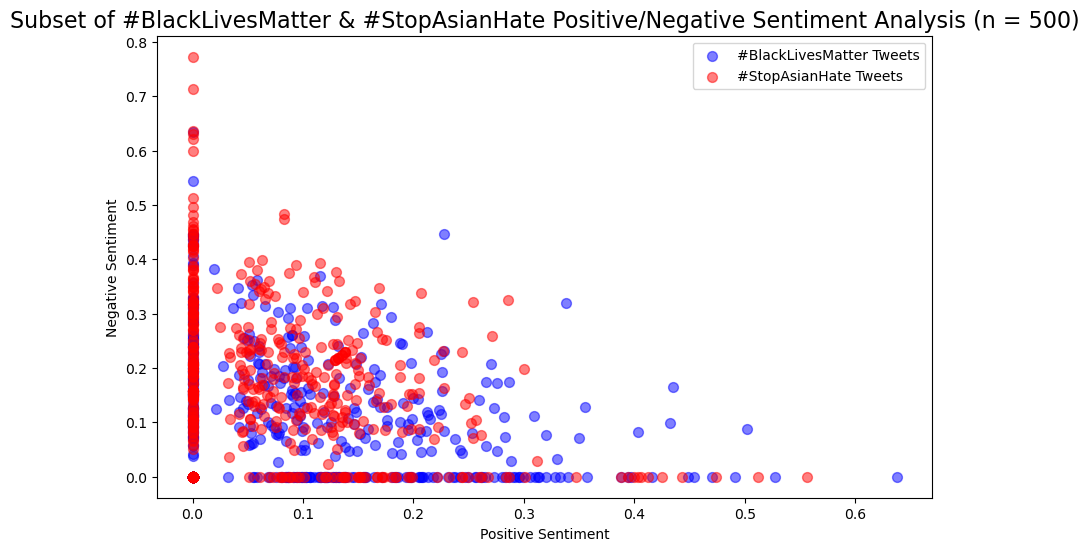

In [60]:
# Scatter plot for BLM
plt.figure(figsize=(10, 6))
scatter_blm = plt.scatter(blm_senti_score['pos'], blm_senti_score['neg'], color='blue', label='#BlackLivesMatter Tweets', s=50, alpha=0.5)

# Scatter plot for SAH
scatter_sah = plt.scatter(sah_senti_score['pos'], sah_senti_score['neg'], color='red', label='#StopAsianHate Tweets', s=50, alpha=0.5)

# Adding labels and title
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')
plt.title('Sentiment Analysis')

# Adding legend
plt.legend()
plt.title('Subset of #BlackLivesMatter & #StopAsianHate Positive/Negative Sentiment Analysis (n = 500)', fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/sentiment_posneg.png')

-------------------------------------------------------------------------------------------------------------------------------
#### 05. Bot Analysis

In [29]:
csv = "/Users/emmanguyen/Downloads/raw_scores-english.csv"
bots = pd.read_csv(csv)

In [30]:
def get_bots(df):
    bots_names = bots["screen_name"]
    tweet_names = df["screen_name"]

    # Convert the screen names to sets for faster lookup
    bots_set = set(bots_names)
    tweet_set = set(tweet_names)

    # Find the common screen names
    bots_indf = bots_set.intersection(tweet_set)

    # Convert the common screen names back to a list
    bots_indf_list = list(bots_indf)

    # Pull out the tweets corresponding to the common screen names
    bot_tweets = df[df["screen_name"].isin(bots_indf_list)]

    return bot_tweets

def remove_bots(botdf, df):
    # Get the indices of rows with common screen names in the original data dataframe
    indices_to_drop = botdf.index

    # Drop the rows from the data dataframe using the indices
    data_nobots = df.drop(indices_to_drop)

    # Display the modified data dataframe
    return data_nobots

In [31]:
blm_bots = get_bots(blm)
sah_bots = get_bots(asian)

blm_nobots = remove_bots(blm_bots, blm)
sah_nobots = remove_bots(sah_bots, asian)

In [32]:
blm_nobots_created = creation_df(blm_nobots, blm_first)
sah_nobots_created = creation_df(sah_nobots, sah_first)

blm_nobots_vol = volume_df(blm_nobots)
sah_nobots_vol = volume_df(sah_nobots)

blm_bots_created = creation_df(blm_bots, blm_first)
sah_bots_created = creation_df(sah_bots, sah_first)

blm_bots_vol = volume_df(blm_bots)
sah_bots_vol = volume_df(sah_bots)

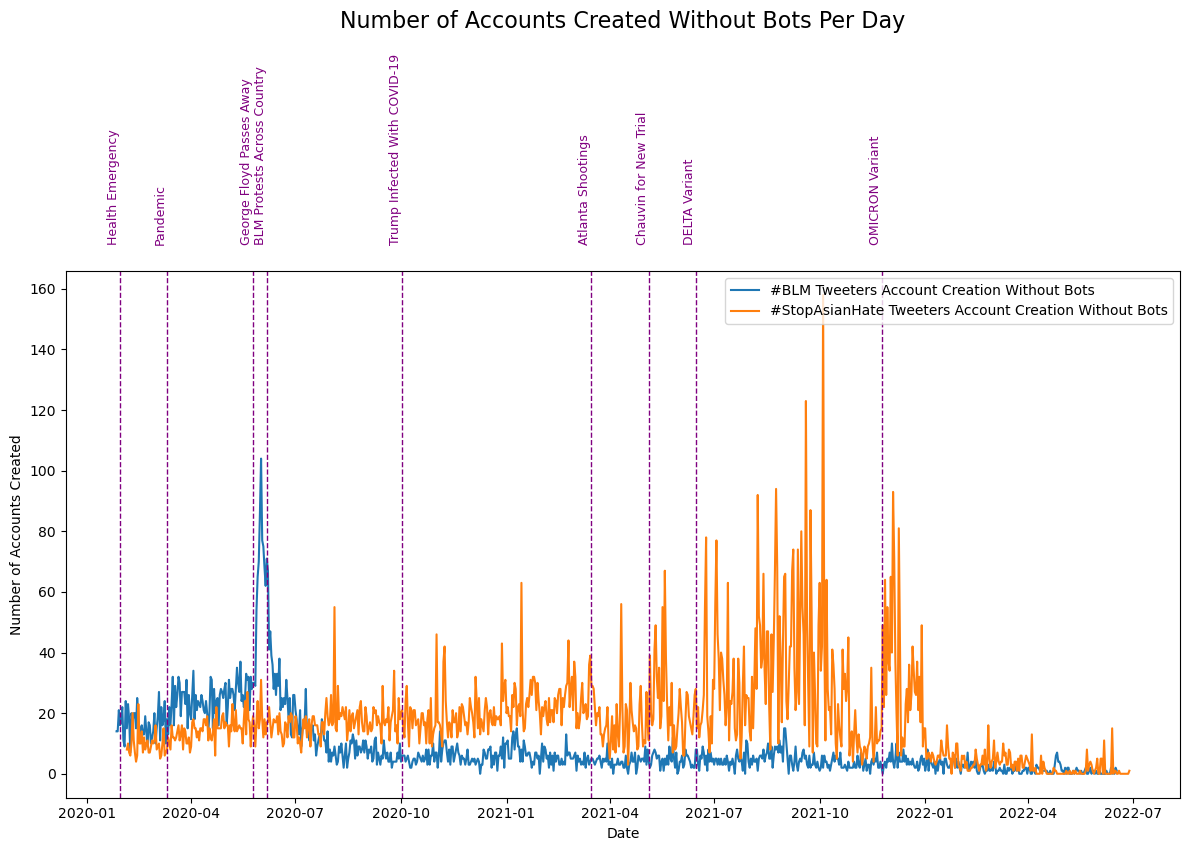

In [59]:
#Account Creation no bots
plt.figure(figsize=(12, 6))
plt.plot(blm_nobots_created['acc_created_ymd'], blm_nobots_created['acc_created_counts'], label='#BLM Tweeters Account Creation Without Bots')
plt.plot(sah_nobots_created['acc_created_ymd'], sah_nobots_created['acc_created_counts'], label='#StopAsianHate Tweeters Account Creation Without Bots')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of Accounts Created Without Bots Per Day', pad=175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/acc_creation_nobots.png')

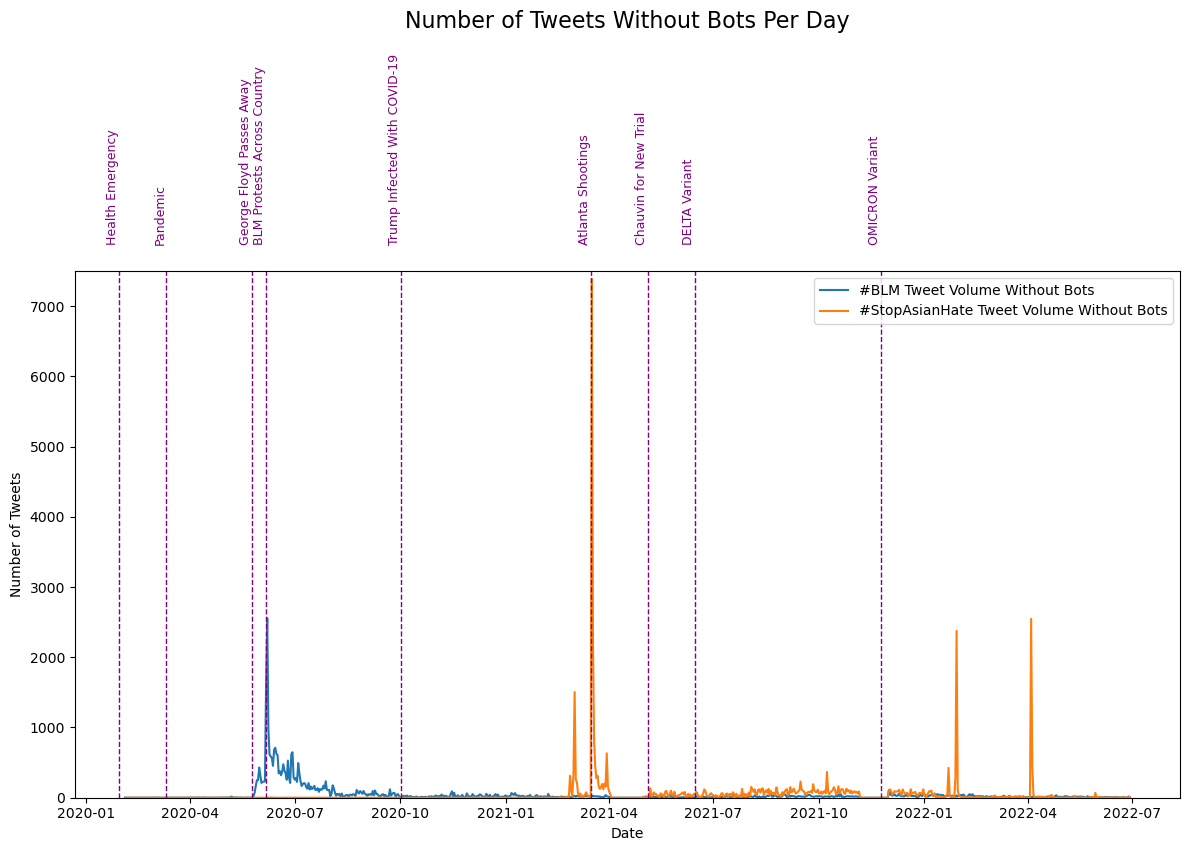

In [58]:
#Tweet Volume no bots
plt.figure(figsize=(12, 6))
plt.plot(blm_nobots_vol['date_ymd'], blm_nobots_vol['tweet_count'], label='#BLM Tweet Volume Without Bots')
plt.plot(sah_nobots_vol['date_ymd'], sah_nobots_vol['tweet_count'], label='#StopAsianHate Tweet Volume Without Bots')
plt.xlabel('Date')
plt.ylim(0, 7500)
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of Tweets Without Bots Per Day', pad=175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_vol_nobots.png')

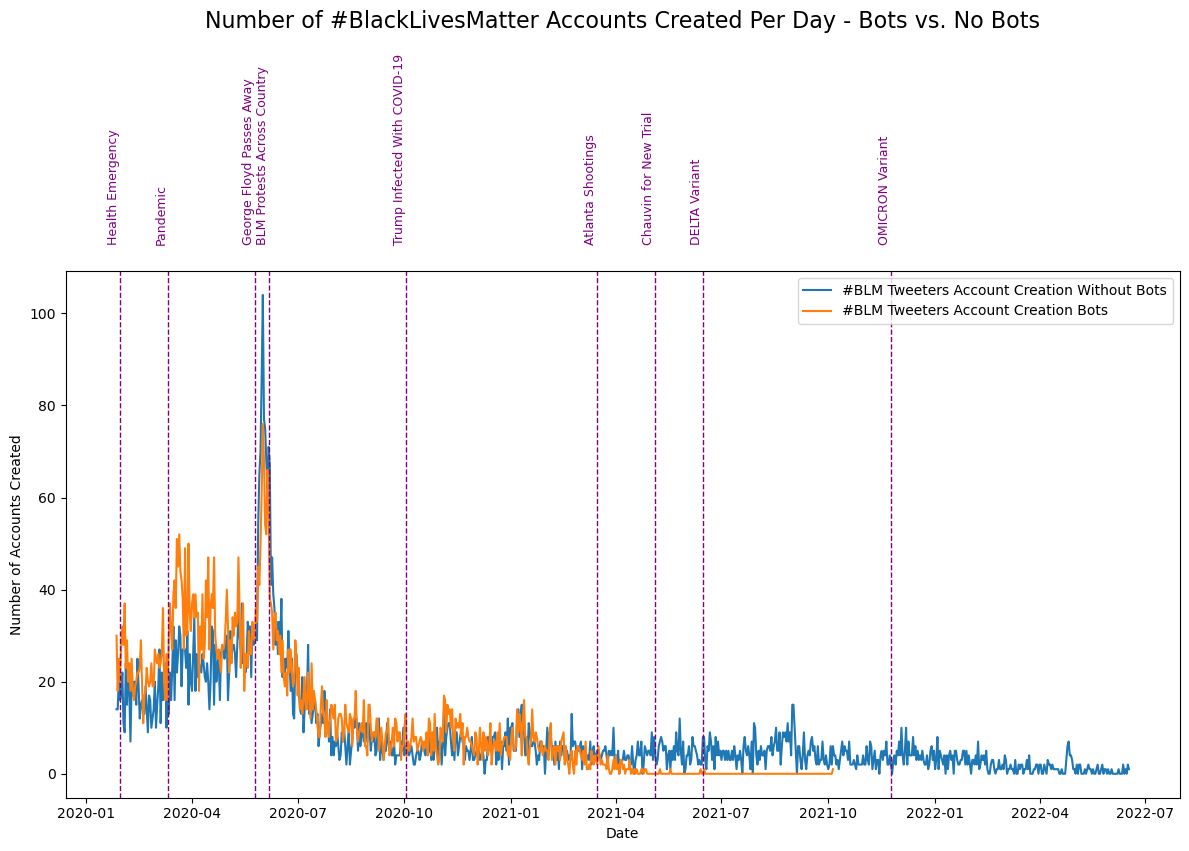

In [57]:
#Account Creation Bots vs. No Bots - BLM
plt.figure(figsize=(12, 6))
plt.plot(blm_nobots_created['acc_created_ymd'], blm_nobots_created['acc_created_counts'], label='#BLM Tweeters Account Creation Without Bots')
plt.plot(blm_bots_created['acc_created_ymd'], blm_bots_created['acc_created_counts'], label='#BLM Tweeters Account Creation Bots')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of #BlackLivesMatter Accounts Created Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/acc_creation_blm_botcompare.png')

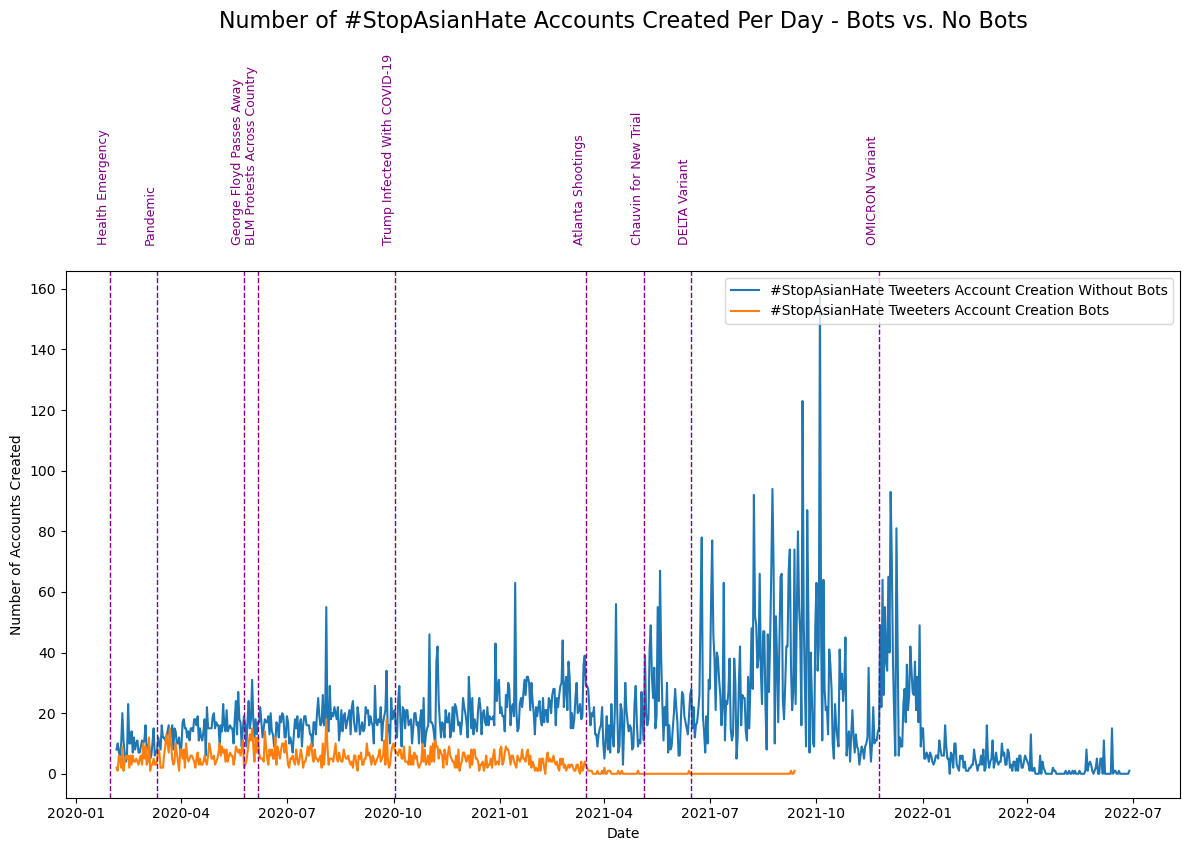

In [56]:
#Account Creation Bots vs. No Bots - Stop Asian Hate
plt.figure(figsize=(12, 6))
plt.plot(sah_nobots_created['acc_created_ymd'], sah_nobots_created['acc_created_counts'], label='#StopAsianHate Tweeters Account Creation Without Bots')
plt.plot(sah_bots_created['acc_created_ymd'], sah_bots_created['acc_created_counts'], label='#StopAsianHate Tweeters Account Creation Bots')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of #StopAsianHate Accounts Created Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/acc_creation_sah_botcompare.png')

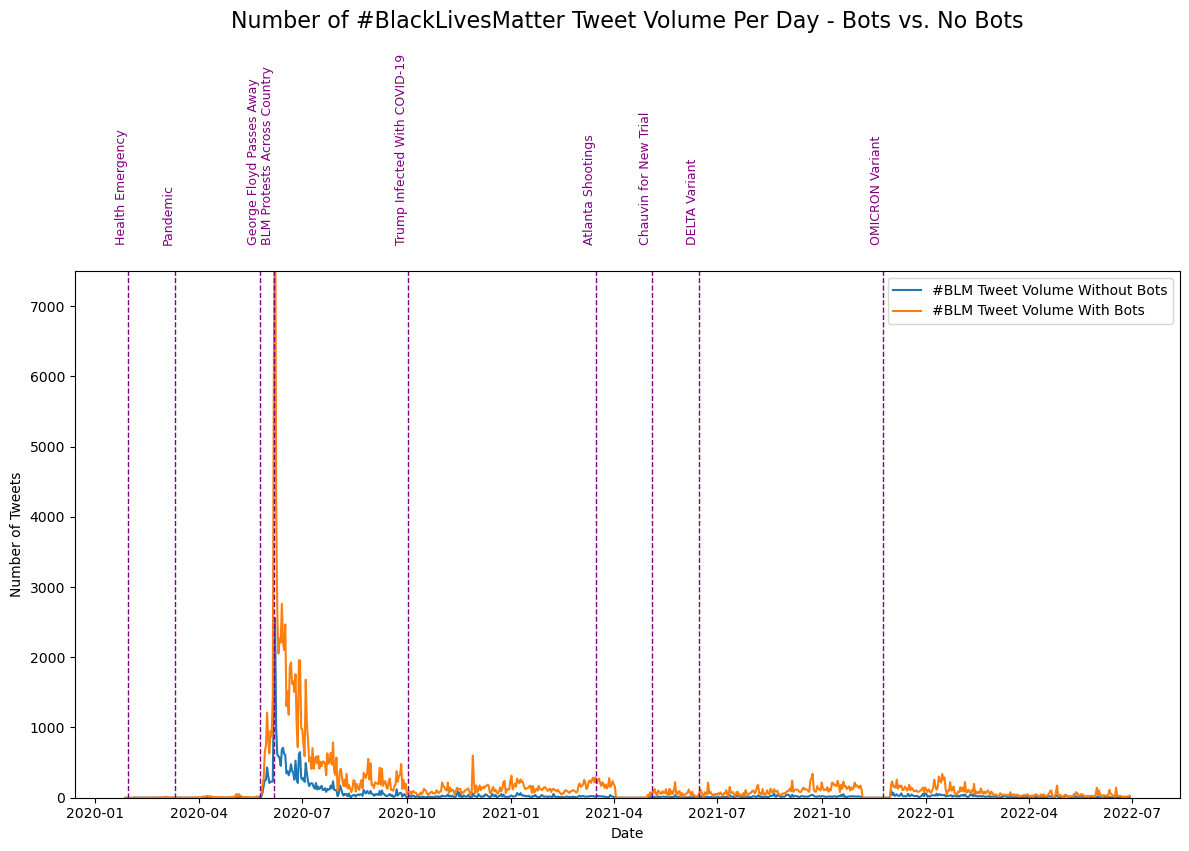

In [55]:
#Tweet Volume Bots vs. No Bots - BLM
plt.figure(figsize=(12, 6))
plt.plot(blm_nobots_vol['date_ymd'], blm_nobots_vol['tweet_count'], label='#BLM Tweet Volume Without Bots')
plt.plot(blm_bots_vol['date_ymd'], blm_bots_vol['tweet_count'], label='#BLM Tweet Volume With Bots')
plt.xlabel('Date')
plt.ylim(0, 7500)
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of #BlackLivesMatter Tweet Volume Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_vol_blm_botcompare.png')

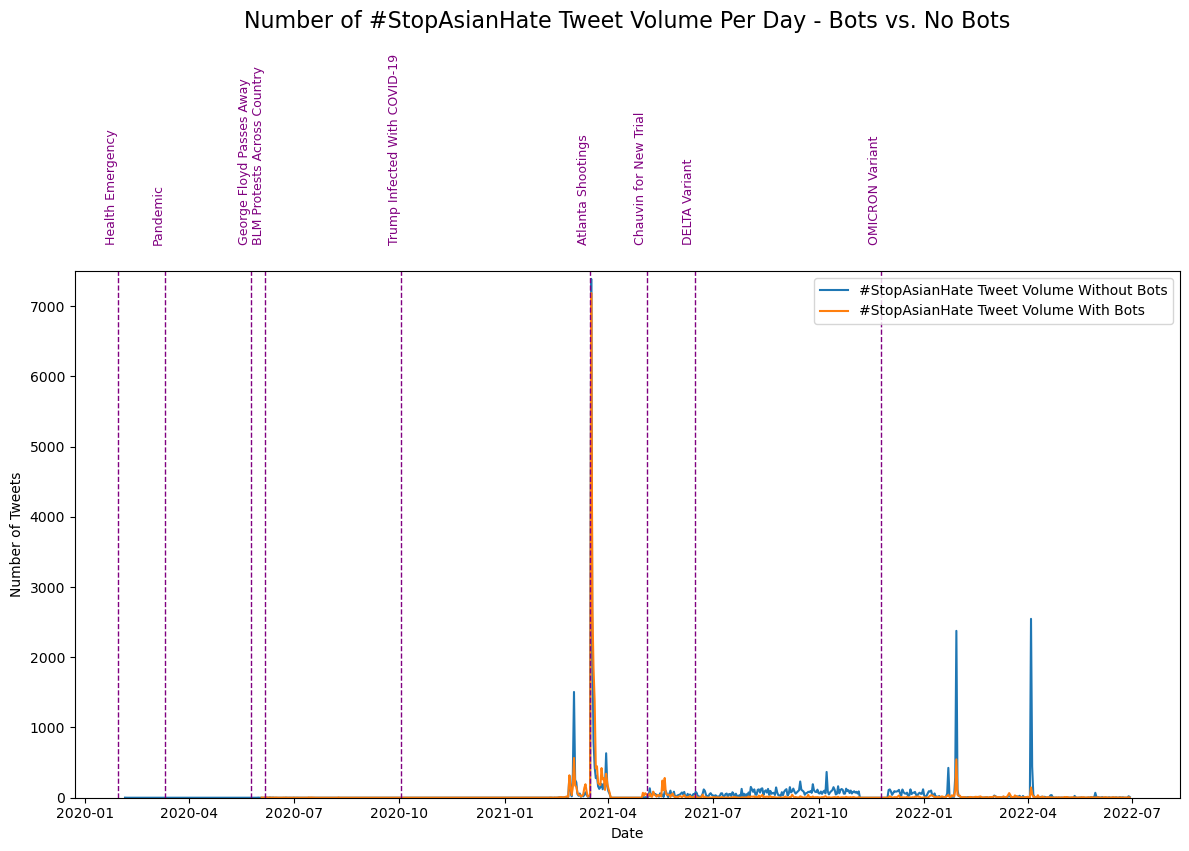

In [54]:
#Tweet Volume Bots vs. No Bots - StopAsianHate
plt.figure(figsize=(12, 6))
plt.plot(sah_nobots_vol['date_ymd'], sah_nobots_vol['tweet_count'], label='#StopAsianHate Tweet Volume Without Bots')
plt.plot(sah_bots_vol['date_ymd'], sah_bots_vol['tweet_count'], label='#StopAsianHate Tweet Volume With Bots')
plt.xlabel('Date')
plt.ylim(0, 7500)
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.legend()
plot_events()
plt.title('Number of #StopAsianHate Tweet Volume Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_vol_sah_botcompare.png')

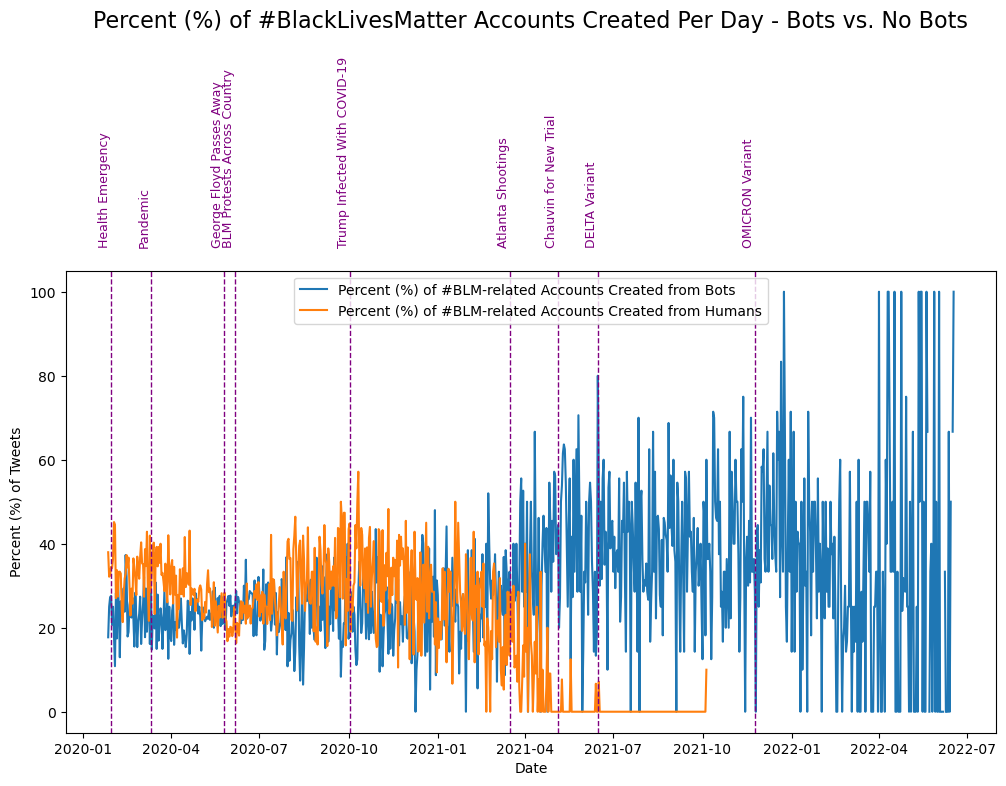

In [53]:
#Percent (%) of #BLM Accounts Per Day - Bots vs. No Bots

merged_blm_accounts = blm_created.merge(blm_nobots_created, on='acc_created_ymd', how='outer', suffixes=('_blm', '_nobots'))\
                   .merge(blm_bots_created, on='acc_created_ymd', how='outer', suffixes=('', '_bots'))

merged_blm_accounts = merged_blm_accounts.rename(columns={
    'acc_created_counts': 'acc_created_counts_bots'
})

merged_blm_accounts["prop_nobots"] = (merged_blm_accounts["acc_created_counts_nobots"] / merged_blm_accounts["acc_created_counts_blm"]) * 100
merged_blm_accounts["prop_bots"] = (merged_blm_accounts["acc_created_counts_bots"] / merged_blm_accounts["acc_created_counts_blm"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_blm_accounts['acc_created_ymd'], merged_blm_accounts['prop_nobots'], label='Percent (%) of #BLM-related Accounts Created from Bots')
plt.plot(merged_blm_accounts['acc_created_ymd'], merged_blm_accounts['prop_bots'], label='Percent (%) of #BLM-related Accounts Created from Humans')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Tweets')
plt.legend()
plt.title('Percent (%) of #BlackLivesMatter Accounts Created Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/acc_creation_blm_botcompare_props.png')

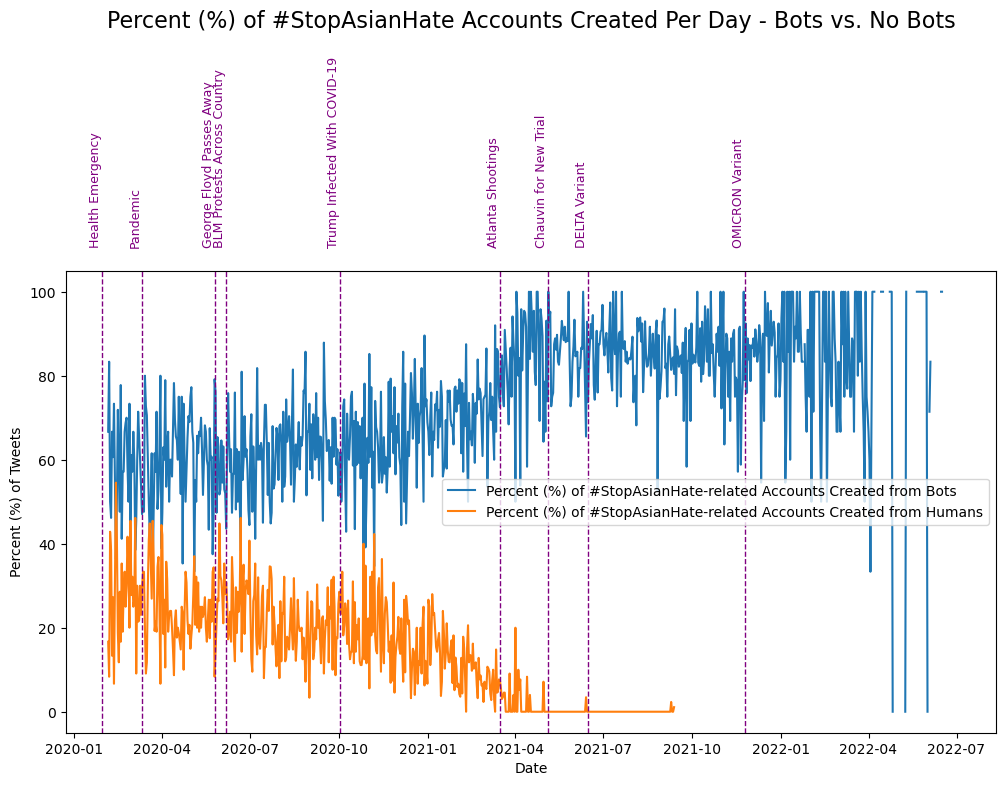

In [52]:
#Percent (%) of #StopAsianHate Accounts Per Day - Bots vs. No Bots

merged_sah_accounts = asian_created.merge(sah_nobots_created, on='acc_created_ymd', how='outer', suffixes=('_sah', '_nobots'))\
                   .merge(sah_bots_created, on='acc_created_ymd', how='outer', suffixes=('', '_bots'))

merged_sah_accounts = merged_sah_accounts.rename(columns={
    'acc_created_counts': 'acc_created_counts_bots'
})

merged_sah_accounts["prop_nobots"] = (merged_sah_accounts["acc_created_counts_nobots"] / merged_sah_accounts["acc_created_counts_sah"]) * 100
merged_sah_accounts["prop_bots"] = (merged_sah_accounts["acc_created_counts_bots"] / merged_sah_accounts["acc_created_counts_sah"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_sah_accounts['acc_created_ymd'], merged_sah_accounts['prop_nobots'], label='Percent (%) of #StopAsianHate-related Accounts Created from Bots')
plt.plot(merged_sah_accounts['acc_created_ymd'], merged_sah_accounts['prop_bots'], label='Percent (%) of #StopAsianHate-related Accounts Created from Humans')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Tweets')
plt.legend()
plt.title('Percent (%) of #StopAsianHate Accounts Created Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/acc_creation_sah_botcompare_props.png')

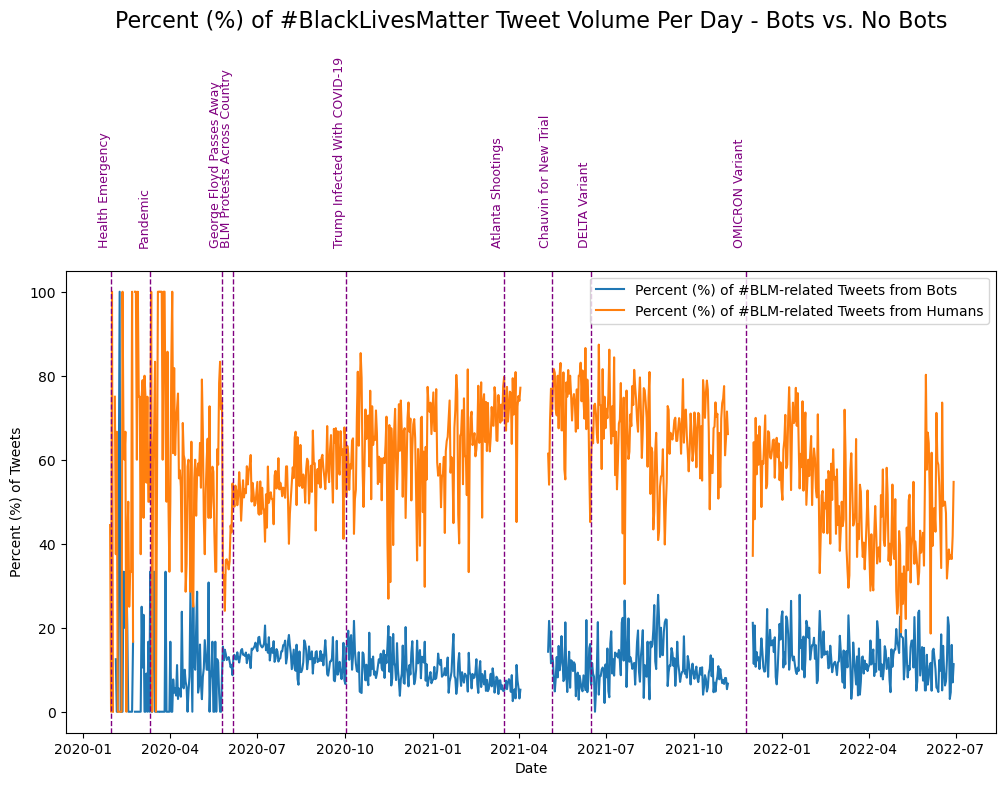

In [49]:
## Percent (%) of #BLM Tweet Volume Per Day - Bots vs. No Bots

merged_blm_tweets = blm_volume.merge(blm_nobots_vol, on='date_ymd', how='outer', suffixes=('_blm', '_nobots'))\
                   .merge(blm_bots_vol, on='date_ymd', how='outer', suffixes=('', '_bots'))

merged_blm_tweets = merged_blm_tweets.rename(columns={
    'tweet_count': 'tweet_count_bots'
})

merged_blm_tweets["prop_nobots"] = (merged_blm_tweets["tweet_count_nobots"] / merged_blm_tweets["tweet_count_blm"]) * 100
merged_blm_tweets["prop_bots"] = (merged_blm_tweets["tweet_count_bots"] / merged_blm_tweets["tweet_count_blm"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_blm_tweets['date_ymd'], merged_blm_tweets['prop_nobots'], label='Percent (%) of #BLM-related Tweets from Bots')
plt.plot(merged_blm_tweets['date_ymd'], merged_blm_tweets['prop_bots'], label='Percent (%) of #BLM-related Tweets from Humans')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Tweets')
plt.legend()
plt.title('Percent (%) of #BlackLivesMatter Tweet Volume Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_vol_blm_botcompare_props.png')

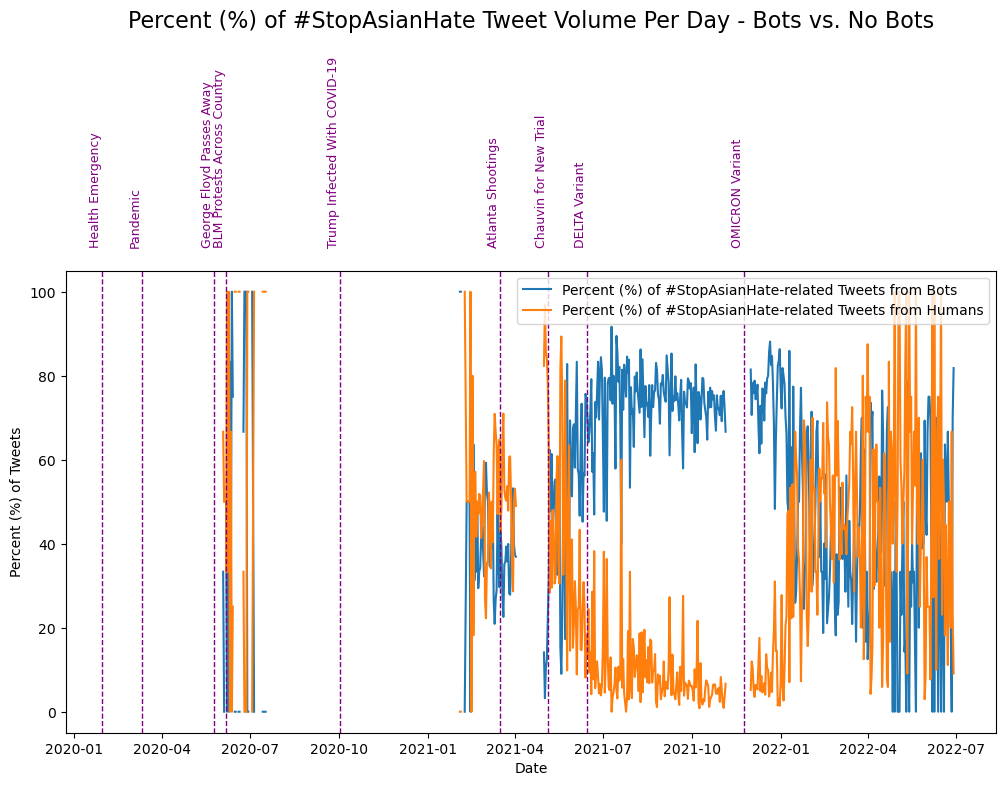

In [48]:
## Percent (%) of #StopAsianHate Tweet Volume Per Day - Bots vs. No Bots

merged_sah_tweets = asian_volume.merge(sah_nobots_vol, on='date_ymd', how='outer', suffixes=('_sah', '_nobots'))\
                   .merge(sah_bots_vol, on='date_ymd', how='outer', suffixes=('', '_bots'))

merged_sah_tweets = merged_sah_tweets.rename(columns={
    'tweet_count': 'tweet_count_bots'
})

merged_sah_tweets["prop_nobots"] = (merged_sah_tweets["tweet_count_nobots"] / merged_sah_tweets["tweet_count_sah"]) * 100
merged_sah_tweets["prop_bots"] = (merged_sah_tweets["tweet_count_bots"] / merged_sah_tweets["tweet_count_sah"]) * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_sah_tweets['date_ymd'], merged_sah_tweets['prop_nobots'], label='Percent (%) of #StopAsianHate-related Tweets from Bots')
plt.plot(merged_sah_tweets['date_ymd'], merged_sah_tweets['prop_bots'], label='Percent (%) of #StopAsianHate-related Tweets from Humans')
plot_events()
plt.xlabel('Date')
plt.ylabel('Percent (%) of Tweets')
plt.legend()
plt.title('Percent (%) of #StopAsianHate Tweet Volume Per Day - Bots vs. No Bots', pad = 175, fontsize = 16)

plt.savefig('/Users/emmanguyen/Documents/GitHub/qss20_covidtweetproject/output/tweet_vol_sah_botcompare_props.png')